# Rent Price

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Define o tema "darkgrid"
sns.set_theme(style="darkgrid")

In [3]:
df = pd.read_csv('teste_indicium_precificacao.csv')
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
# Novos dados
new_input = {'id': [2595],
 'nome': ['Skylit Midtown Castle'],
 'host_id': [2845],
 'host_name': ['Jennifer'],
 'bairro_group': ['Manhattan'],
 'bairro': ['Midtown'],
 'latitude': [40.75362],
 'longitude': [-73.98377],
 'room_type': ['Entire home/apt'],
 'price': [225],
 'minimo_noites': [1],
 'numero_de_reviews': [45],
 'ultima_review': ['2019-05-21'],
 'reviews_por_mes': [0.38],
 'calculado_host_listings_count': [2],
 'disponibilidade_365': [355]}

new_data = pd.DataFrame(new_input)

In [5]:
df = df.append(new_data)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14744\1326378303.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_data)


#### Verificando e tratando os dados

In [6]:
df.shape

(48895, 16)

In [7]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [8]:
df.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

In [9]:
df.dropna(subset = 'nome', inplace = True)
#dropando nan na coluna nome

In [10]:
df.dropna(subset = 'host_name', inplace = True)
#dropando nan na coluna host_name

In [11]:
df.ultima_review.fillna('Sem avaliaçao', inplace = True)
#especificando na coluna quais nao tiveram avaliação, pode ser um dado interessante

In [12]:
df.reviews_por_mes.fillna(df.reviews_por_mes.mean(), inplace = True)
#substituindo dados faltantes pela média

In [13]:
df.isna().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [14]:
#não temos dados duplicados, o que indica que nenhum host tem mais de um local para alugar/vender
df.duplicated().sum()

1

## EDA

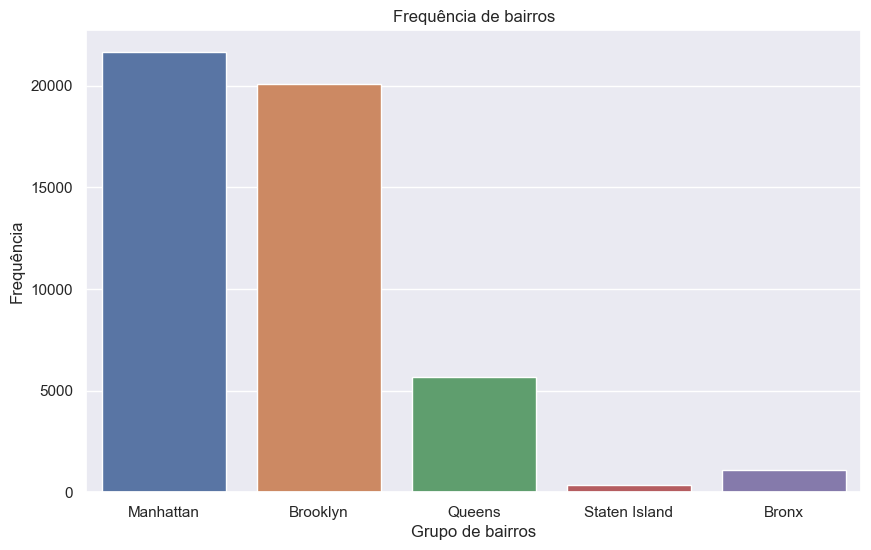

In [15]:
#Descritiva da variavel bairro_group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bairro_group')
plt.title('Frequência de bairros')
plt.ylabel('Frequência')
plt.xlabel('Grupo de bairros')
plt.show()

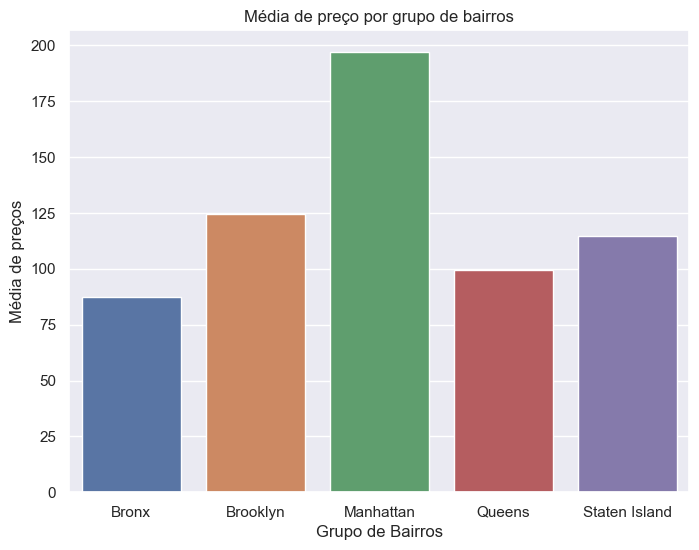

In [16]:
#Valor médio gasto por grupo de bairro
df_por_bairro = df.groupby('bairro_group')['price'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=df_por_bairro, x='bairro_group', y='price')
plt.title('Média de preço por grupo de bairros')
plt.ylabel('Média de preços')
plt.xlabel('Grupo de Bairros')
plt.show()

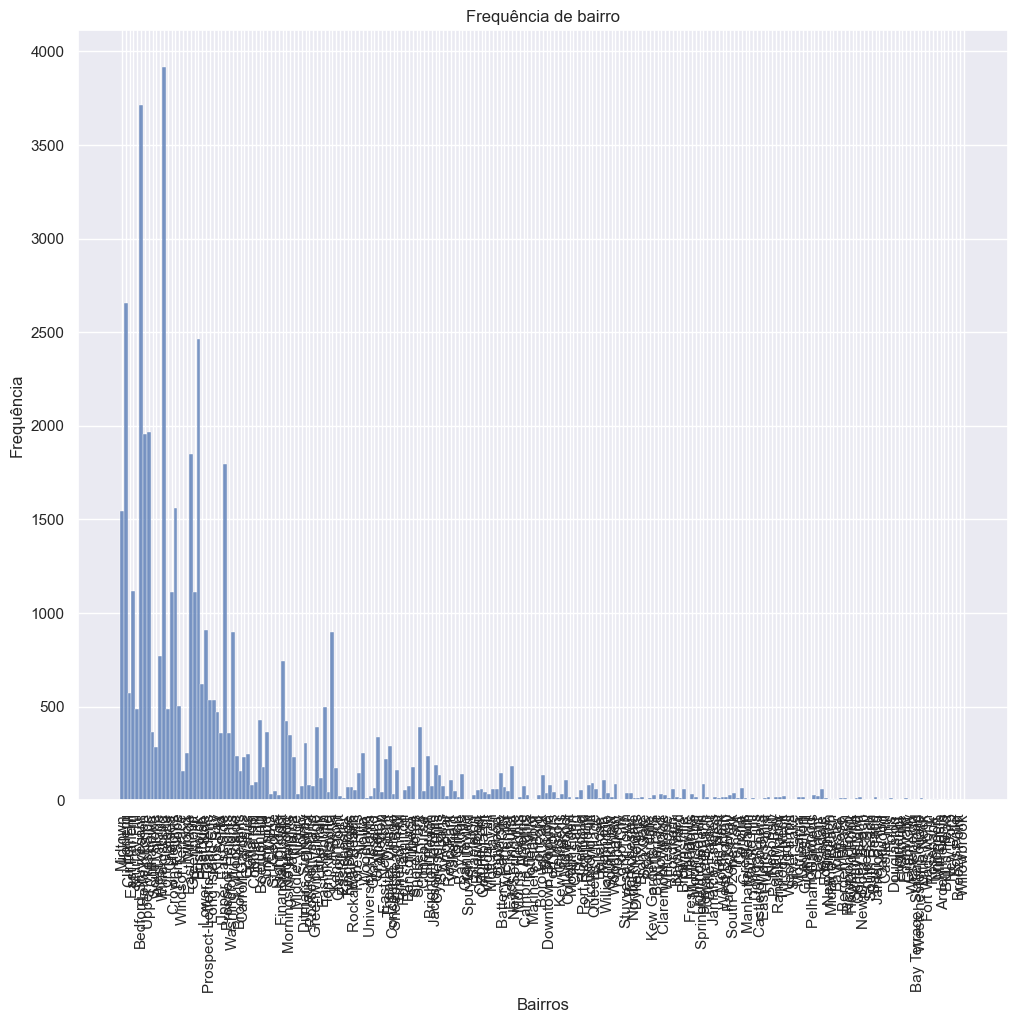

In [17]:
#Descritiva da variavel bairro
plt.figure(figsize=(12, 10))
sns.histplot(data=df, x='bairro')
plt.title('Frequência de bairro')
plt.ylabel('Frequência')
plt.xlabel('Bairros')
plt.xticks(rotation = 90)
plt.show()

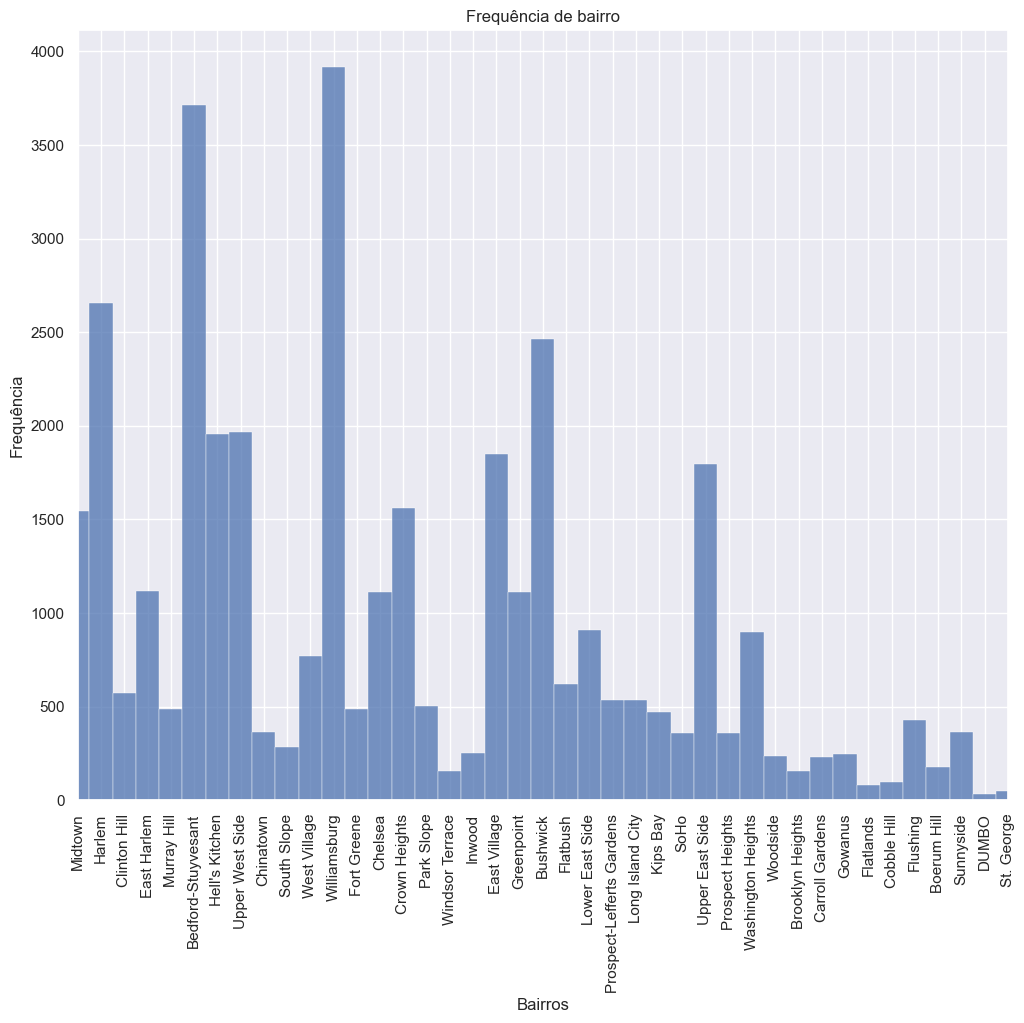

In [18]:
#aqui podemos ver melhor quais sao os 40 primeiros e principais bairros 
plt.figure(figsize=(12, 10))
sns.histplot(data=df, x='bairro')
plt.title('Frequência de bairro')
plt.ylabel('Frequência')
plt.xlabel('Bairros')
plt.xticks(rotation = 90)
plt.xlim(0, 40)
plt.show()

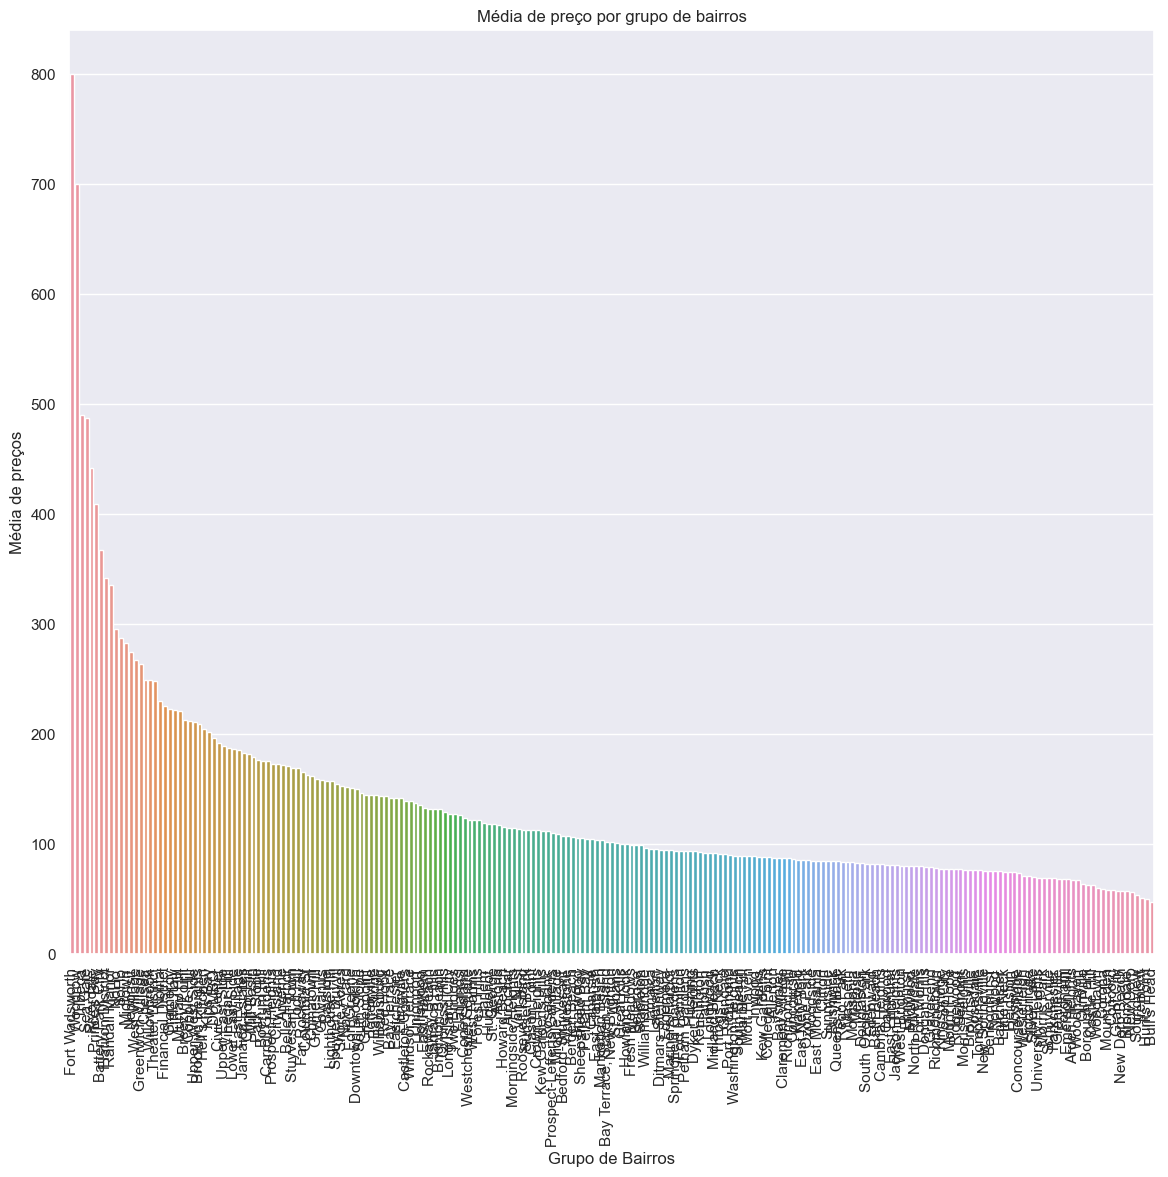

In [19]:
#Valor médio gasto por bairro
df_por_bairro = df.groupby('bairro')['price'].mean().reset_index()
df_por_bairro.sort_values(by = 'price', ascending = False, inplace = True)
plt.figure(figsize=(14,12))
sns.barplot(data=df_por_bairro, x='bairro', y='price')
plt.title('Média de preço por grupo de bairros')
plt.ylabel('Média de preços')
plt.xlabel('Grupo de Bairros')
plt.xticks(rotation = 90)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


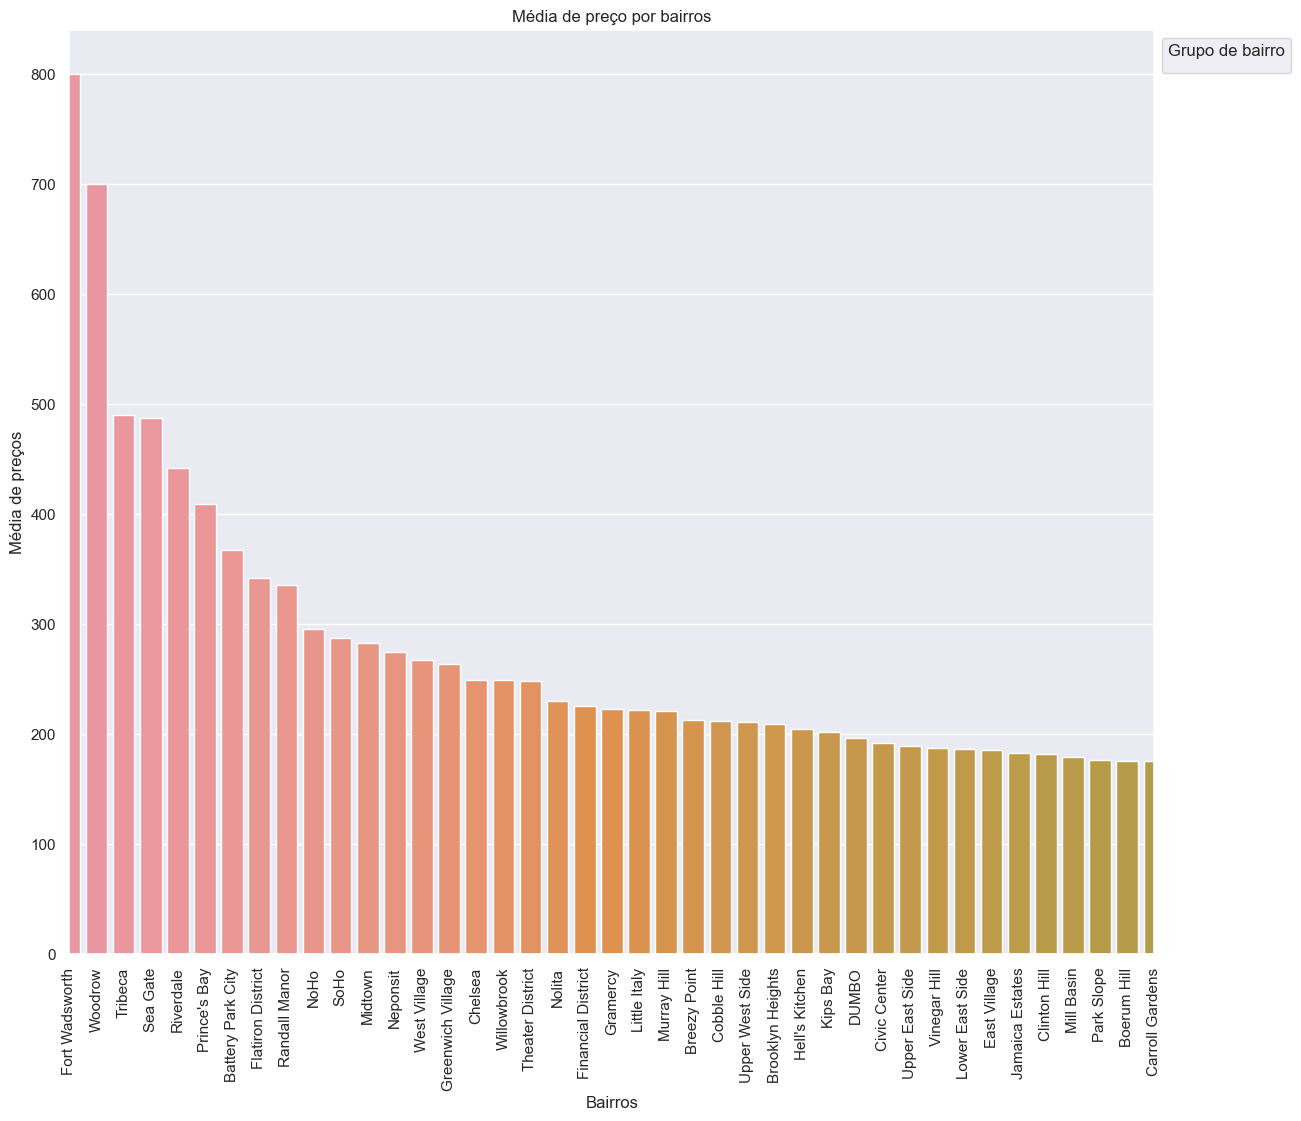

In [20]:
#Valor médio gasto por bairro, nos 40 bairros mais caros
df_por_bairro = df.groupby('bairro')['price'].mean().reset_index()
df_por_bairro.sort_values(by = 'price', ascending = False, inplace = True)
plt.figure(figsize=(14,12))
sns.barplot(data=df_por_bairro, x='bairro', y='price')
plt.title('Média de preço por bairros')
plt.ylabel('Média de preços')
plt.xlabel('Bairros')
plt.xticks(rotation = 90)
plt.xlim(0,40)
plt.legend(title='Grupo de bairro', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


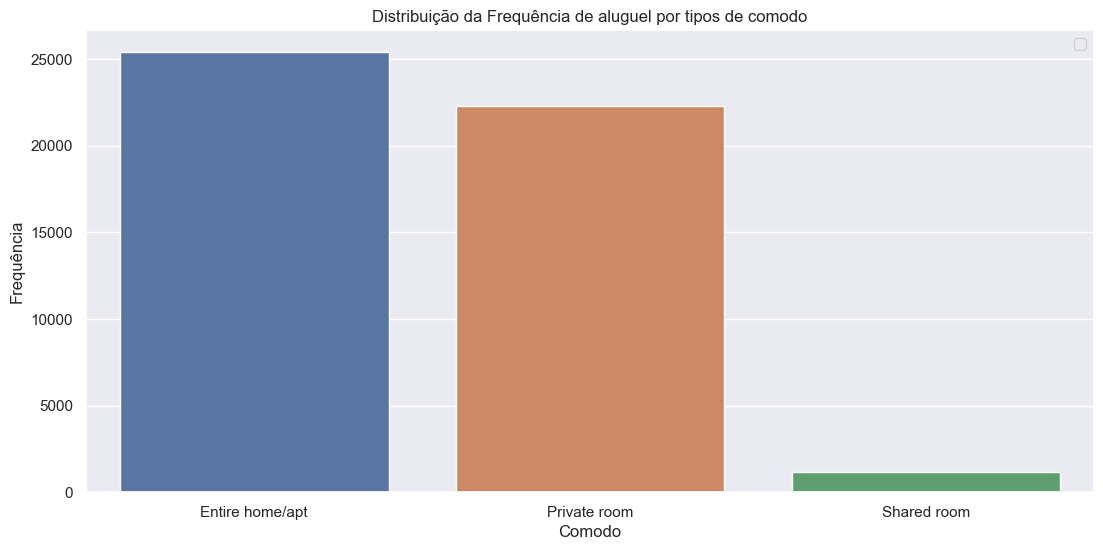

In [21]:
#Distribuição de tipos de comodo
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='room_type')
plt.legend(loc='best')
plt.title('Distribuição da Frequência de aluguel por tipos de comodo')
plt.xlabel('Comodo')
plt.ylabel('Frequência')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Preço')

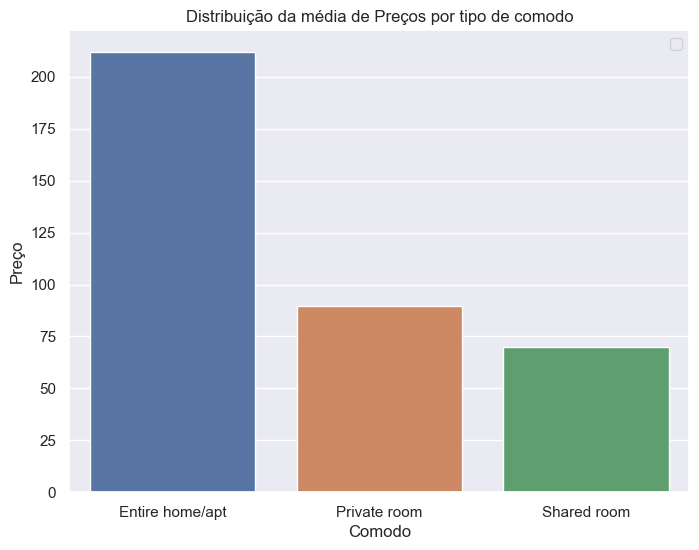

In [22]:
#Valor médio gasto por cada tipo de comodo
df_por_bairro = df.groupby('room_type')['price'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=df_por_bairro, x='room_type', y='price')
plt.legend(loc='best')
plt.title('Distribuição da média de Preços por tipo de comodo')
plt.xlabel('Comodo')
plt.ylabel('Preço')

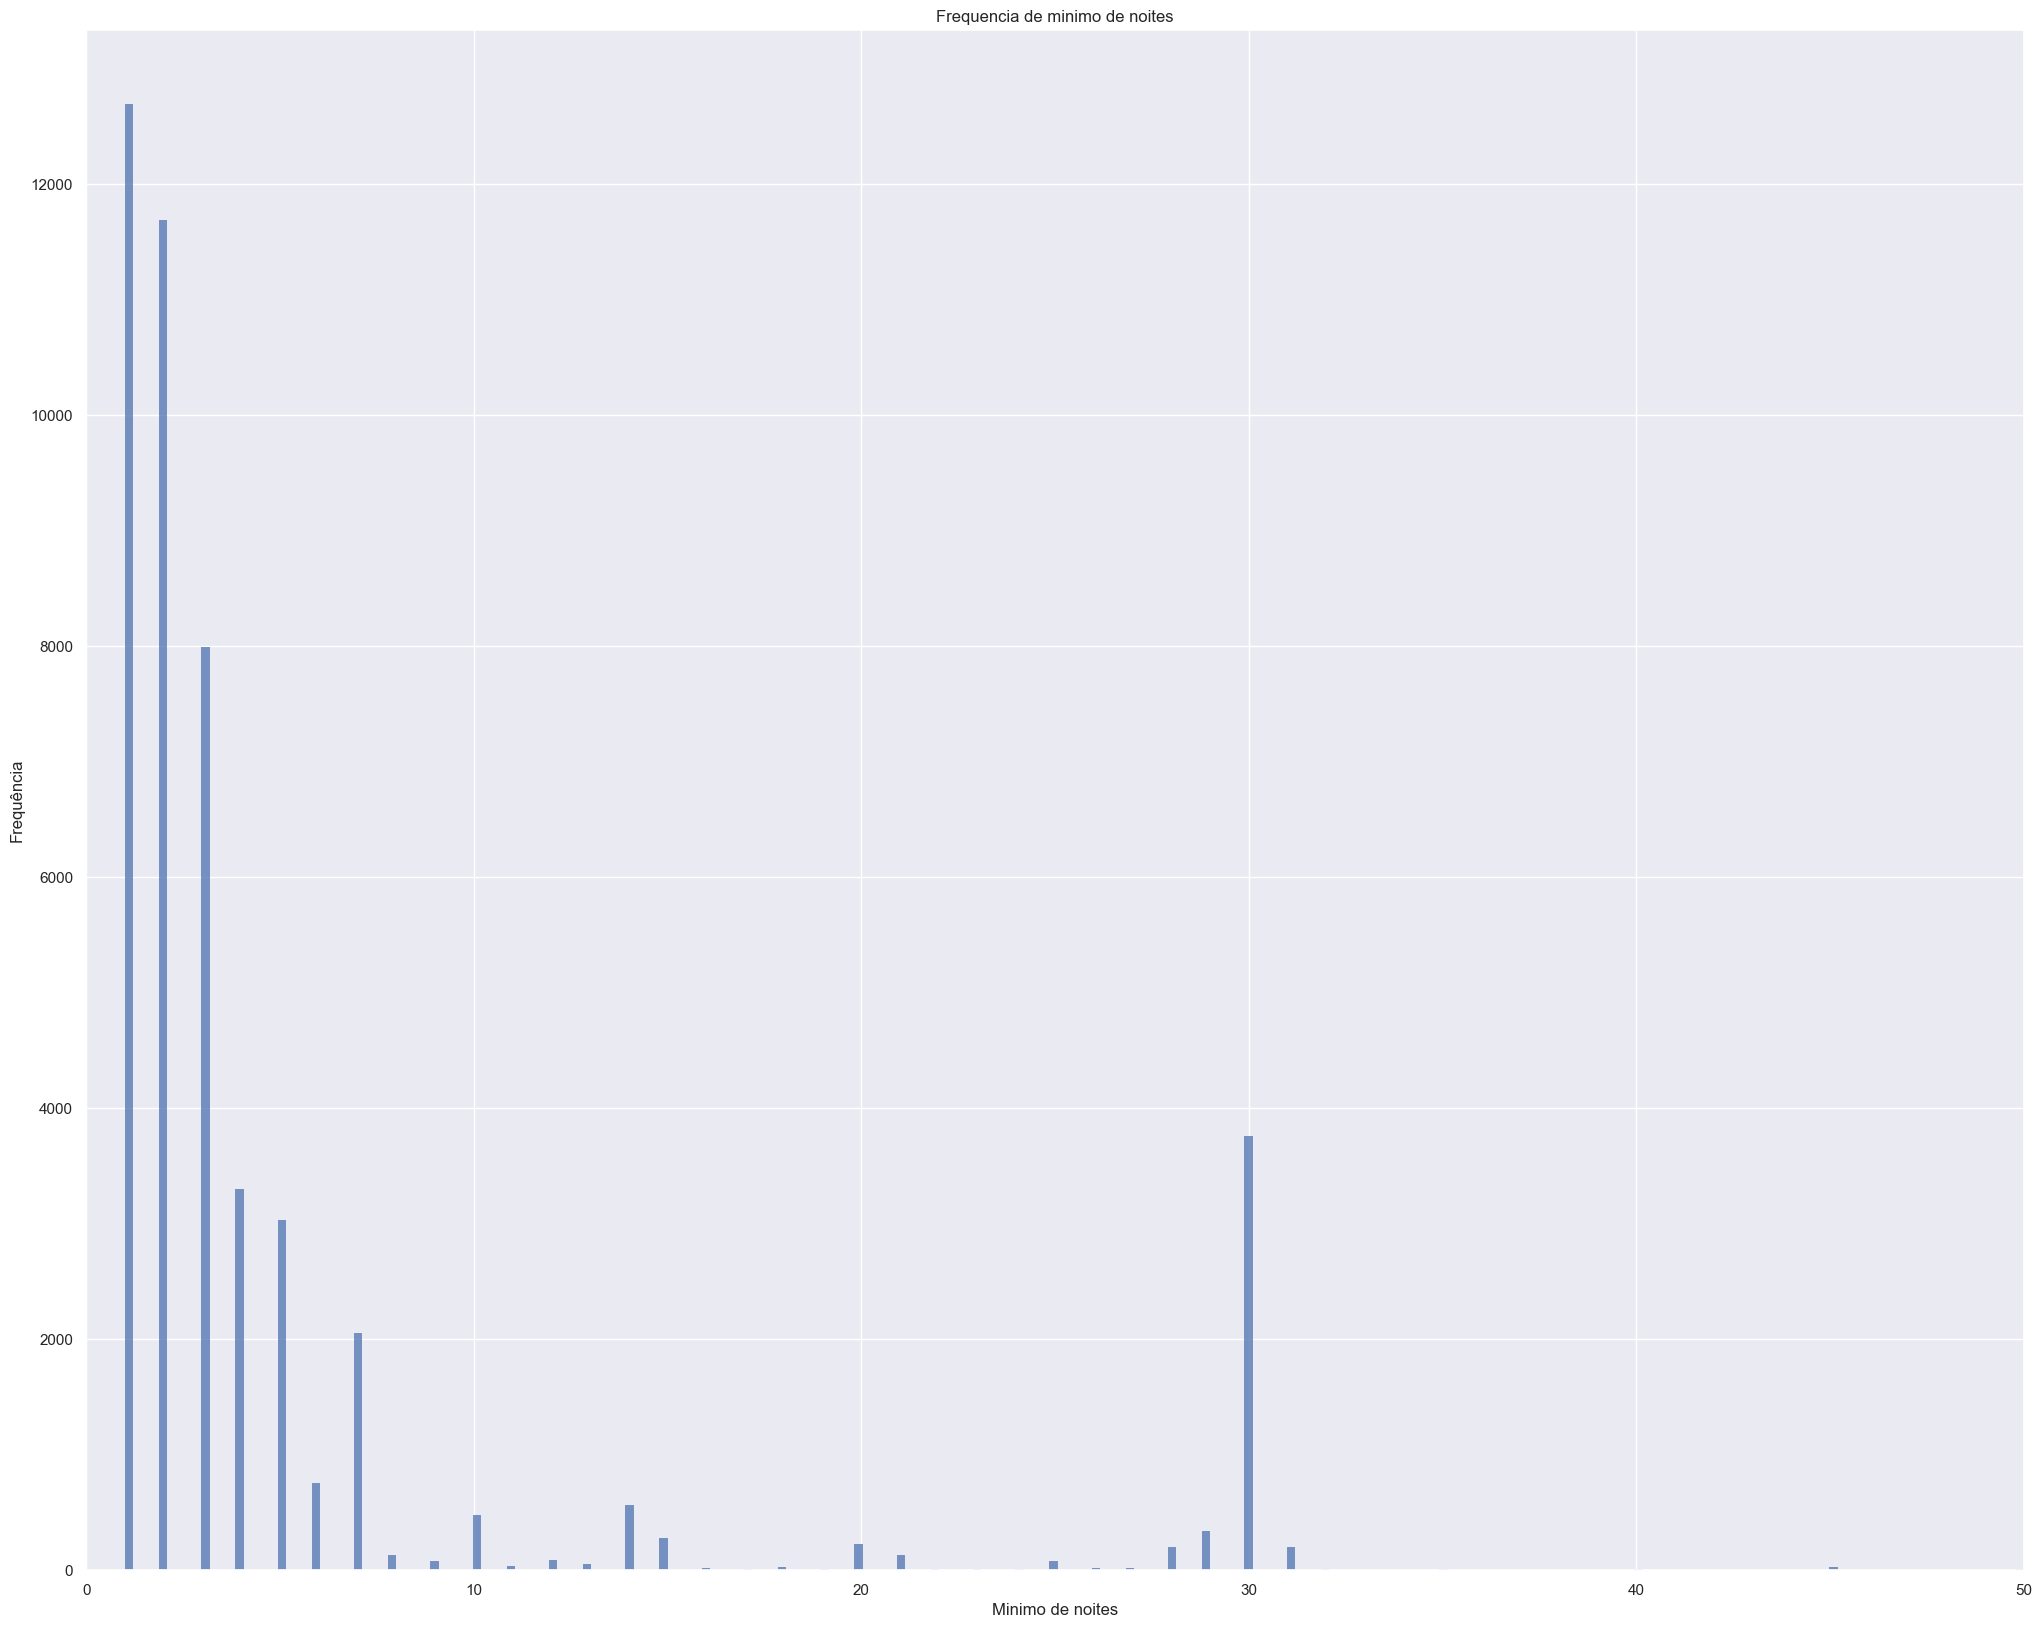

In [23]:
#Descritiva da variavel minimo_noites
plt.figure(figsize=(25, 20))
sns.histplot(data=df, x='minimo_noites')
plt.title('Frequencia de minimo de noites')
plt.ylabel('Frequência')
plt.xlabel('Minimo de noites')
plt.xlim(0, 50)

plt.show()

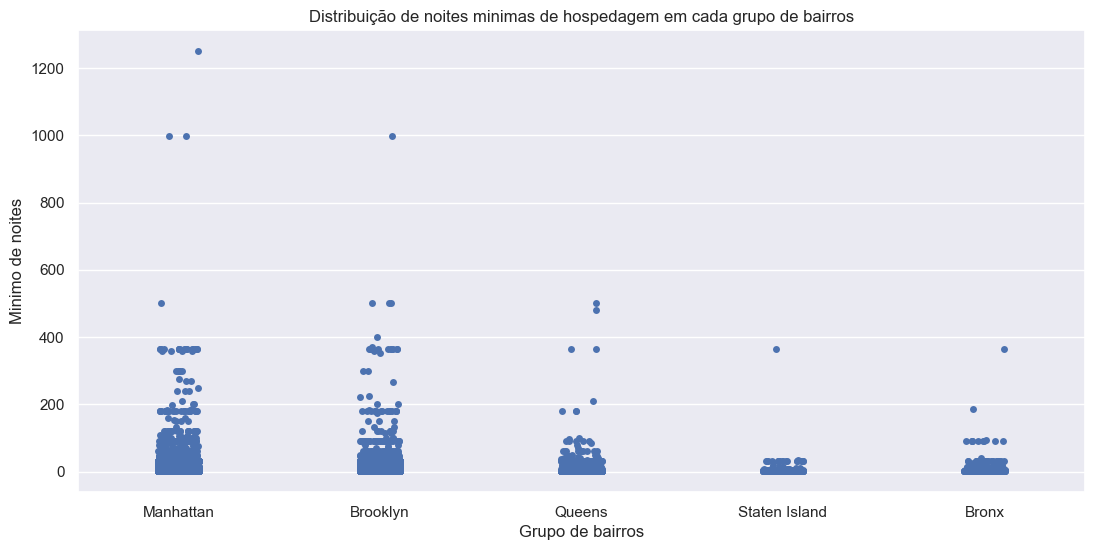

In [24]:
#descritiva da variavel minimo_noite
plt.figure(figsize=(13, 6))
sns.stripplot(data=df, x='bairro_group', y='minimo_noites')
plt.title('Distribuição de noites minimas de hospedagem em cada grupo de bairros')
plt.xlabel('Grupo de bairros')
plt.ylabel('Minimo de noites')

plt.ticklabel_format(style='plain',
                     axis='y')  # Desativa a anotação científica no eixo y

plt.show()

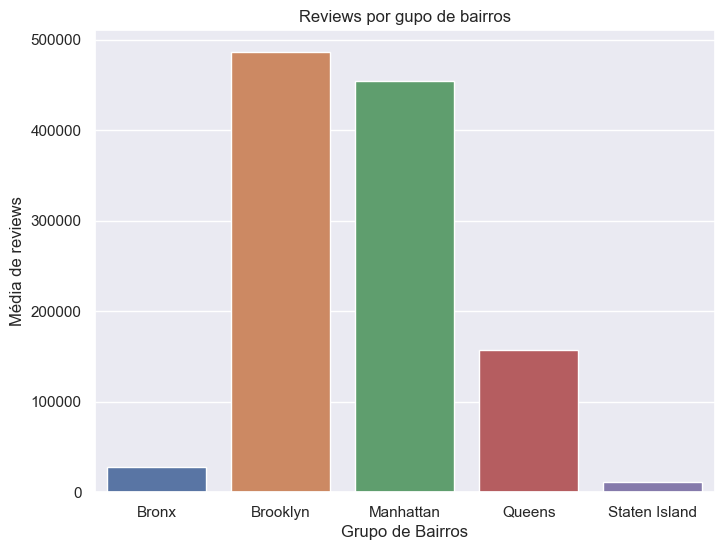

In [25]:
#Soma de reviews por grupo de bairros
df_por_bairro = df.groupby('bairro_group')['numero_de_reviews'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=df_por_bairro, x='bairro_group', y='numero_de_reviews')
plt.title('Reviews por gupo de bairros')
plt.ylabel('Média de reviews')
plt.xlabel('Grupo de Bairros')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


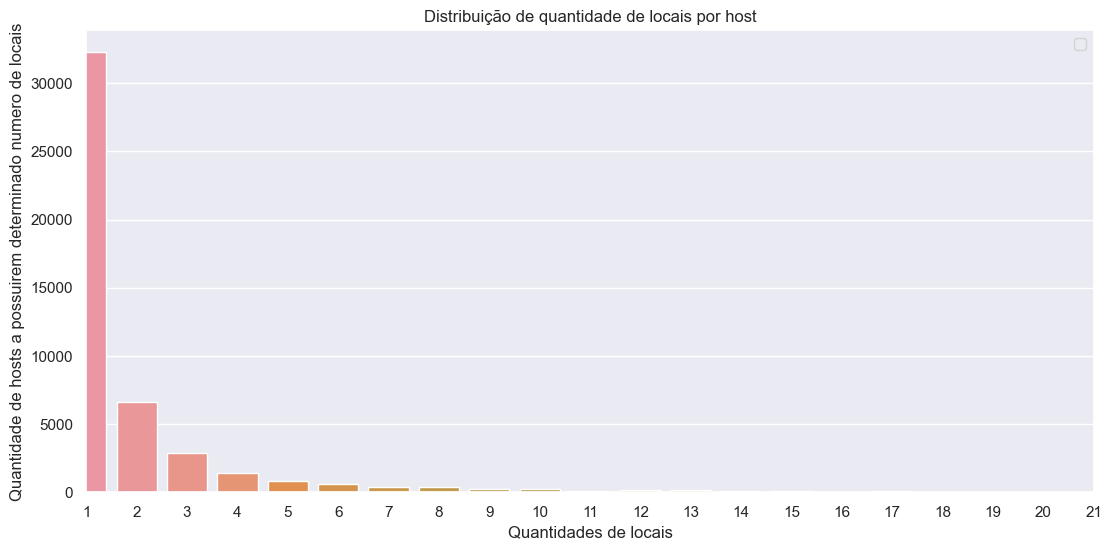

In [26]:
#Descritiva da quantidade de locais por hosts
plt.figure(figsize=(13, 6))
sns.countplot(data=df, x='calculado_host_listings_count')
plt.legend(loc='best')
plt.title('Distribuição de quantidade de locais por host')
plt.xlabel('Quantidades de locais')
plt.ylabel('Quantidade de hosts a possuirem determinado numero de locais')
plt.xlim(0, 20)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Bairros')

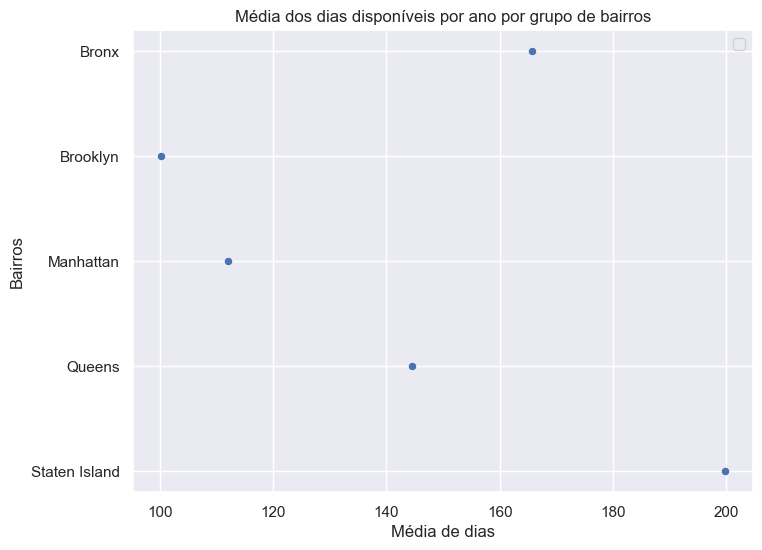

In [27]:
#Media dos dias disponiveis por ano por aluguel
df_por_bairro = df.groupby('bairro_group')['disponibilidade_365'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_por_bairro, x='disponibilidade_365', y='bairro_group')
plt.legend(loc='best')
plt.title('Média dos dias disponíveis por ano por grupo de bairros')
plt.xlabel('Média de dias')
plt.ylabel('Bairros')

## Hipóteses iniciais

- A maioria dos locais se concentram em Manhattan e no Brooklyn, com mais de 20.000 locais;
- A média de preço é mais cara em Manhattan, sendo US00,00, bem maior que as demais, inclusive do brooklyn que fica em segundo com uma média de US125,00;
- Dentro de cada “região” ou  grupo de bairros (como Manhattan e Brooklyn) existem bairros, neste há uma concentração maior no bairro de Williamsburg, que é justamente no brooklyn, em segundo fica Bedford-stuyvesant também no brooklyn;
- Os dois mais frequentados não estão entre os 40 bairros com média mais alta;
- O bairro mais caro é na verdade um monumento de Nova York Fort Wadsworth, logo não entra no mérito apenas da localzação;
- O segundo bairro com média mais cara fica em staten island, e em Manhattan que apesar de ter a maior frequência vem apenas em terceiro que é a Tribeca;
- A maioria dos hosts alugam apartamentos inteiros (25.000), mas boa parte aluga um comodo apenas (+-22.000), e uma parte quase inexpressiva de menos de 2000 aluga quartos compartilhados;
- Um apartamento inteiro é em média US200,00 enquanto um comodo separado é US85,00. Em contrapartida, apesar de ter pouco oferecimento, quartos compartilhados são pouca coisa mais baratos do que comodos inteiros separados sendo US65,00;
- Grande maioria dos hosts aceita um mínimo de uma noite de hospedagem (mais de 12.000) deles, enquanto pouco menos de 12.000 aceita a partir de 2 noites e 8000 aceitam a partir de 3 noites;
- Os grupos de bairros que mais possuem alugueis minimos de pelo menos 365 noites (1 ano) são Manhattan e o Brooklyn;
- Todos mantém uma maior média de no minimo 1 noite de hospedagem;
- Apesar de possuir uma maior frequência de locais para se alugar, Manhattan não possui um maior número de reviews, a região com maior número de reviews é o Brooklyn, e o com menor número de reviews Staten Island;
- Maioria dos hosts possui apenas um local para aluguel, pouco mais de 5000 possuem 2, e assim sucessivamente diminuindo hosts com uma maior quantidade de alugueis disponíveis;
- Os locais no Brooklyn ficam disponíveis em média 100 dias por ano, em Manhattan 70 dias por ano, no Queens 145 dias por ano, no Bronx 165 dias por ano e em Staten Island 200 dias por ano;
- Podemos perceber que apesar da frequência alta, Brooklyn e Manhattan possuem os locais com disponibilidade mais curta por ano, indicando que possivelmente possuem um aluguel por temporada de férias ou feriados, o que também talvez pudesse aumentar o preço


## Perguntas

###### a) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
- O Mais indicado seria Manhattan, poisé um bairro que possui uma frequência de aluguel maior junto de uma média de preço maior.

###### b)	O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
- Maioria dos bairros aceitam uma quantidade minima de 1 noite, porém os locais com uma disponibilidade durante o ano menor tendem a ter uma média de preço maior.  O que pode indicar que por ser uma cidade turistica, tais locais alguem para datas festivas e feriados, gerando uma incidência menor de dias disponíveis mas com preços mais altos.

###### c)	Existe algum padrão no texto do nome do local para lugares de mais alto valor?
- Sim, palavras como Luxury, ou huge, ou outros indicativos de luxo indicam um preço mais alto, porém o que mais indica é o nome da região, como Manhattan, Manhattan east side e afins, tal nome seguido de vista ou algo do gênero possuem um preço mais caro (o nome ja explicao porquê). Ou seja, os nomes indicam determinado valor, não somente pela caracteristica, mas também por uma indicação de local.


### Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

- Como será uma previsão de valor, algo que não poderá ser colocado em binario 1 e 2, optarei por utilizar DecisionTreeRegressor, já que é um problema de classificação. A partir disso preciso transformar minhas variáveis em dummies então optei por descartar qualqer variável que tivesse algum valor único não numérico, como nome, ou até mesmo variáveis como o bairro, pois deixaria o modelo extremamente pesado então utilizei as seguintes variáveis: latitude, longitude, price, minimo_noites, numero_de_reviews, reviews_por_mes, calculado_host_listings_count, disponibilidade_365 e bairro_group, room_type. O modelo de DecisionTreeRegressor foi escolhido por se aproximar do conjunto de dados, por conseguir trabalhar com diversos tipos de dados e por ser um modelo onde possa se predizer um valor, não necessitando ser algo binário, os contras é que existem chances dele se tornar extremamente overfittado. E por fim a performance escolhida foi de acurácia avaliada pelo R2.

### 4)Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?
A sugestão de preço para tal aparteamento seria de R$197,00 dólares


# Desenvovendo o modelo

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 0
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48858 non-null  int64  
 1   nome                           48858 non-null  object 
 2   host_id                        48858 non-null  int64  
 3   host_name                      48858 non-null  object 
 4   bairro_group                   48858 non-null  object 
 5   bairro                         48858 non-null  object 
 6   latitude                       48858 non-null  float64
 7   longitude                      48858 non-null  float64
 8   room_type                      48858 non-null  object 
 9   price                          48858 non-null  int64  
 10  minimo_noites                  48858 non-null  int64  
 11  numero_de_reviews              48858 non-null  int64  
 12  ultima_review                  48858 non-null  obj

In [32]:
##Remoção de outliers
df.minimo_noites.describe()

count    48858.000000
mean         7.012444
std         20.019757
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimo_noites, dtype: float64

In [33]:
# Remover os outliers de tempo de emprego
min_noites = df['minimo_noites'].values
# Valores do quartil 25 e quartil 75
q25, q75 = np.percentile(min_noites, 25), np.percentile(min_noites, 75)
print('QUARTIL 25: {} | QUARTIL 75: {}'.format(q25, q75))
# Interquartile range
min_noites_iqr = q75 - q25
print('IQR: ', min_noites_iqr)

# Limiar
min_noites_cut_off = min_noites_iqr * 1.5
# Limite superior e inferior
min_noites_lower, min_noites_upper = q25 - min_noites_cut_off, q75 + min_noites_cut_off
print('LIMIAR: ', min_noites_cut_off)
print('Minimo de Noites LIMITE INFERIOR', min_noites_lower)
print('Minimo de Noites LIMITE SUPERIOR', min_noites_upper)

# Ouliers (fora os limites estabelecidos anteriormente)
outliers = [x for x in min_noites if x < min_noites_lower or x > min_noites_upper]
print('Minimo de Noites QUANTIDADE DE OUTLIERS:', len(outliers))

# Novo dataframe sem os outliers
df_train_1 = df.drop(
    df[(df['minimo_noites'] > min_noites_upper) |
             (df['minimo_noites'] < min_noites_lower)].index)
print('----' * 44)

QUARTIL 25: 1.0 | QUARTIL 75: 5.0
IQR:  4.0
LIMIAR:  6.0
Minimo de Noites LIMITE INFERIOR -5.0
Minimo de Noites LIMITE SUPERIOR 11.0
Minimo de Noites QUANTIDADE DE OUTLIERS: 6605
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [34]:
df_train_1.shape

(42253, 16)

In [35]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42253 entries, 0 to 0
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             42253 non-null  int64  
 1   nome                           42253 non-null  object 
 2   host_id                        42253 non-null  int64  
 3   host_name                      42253 non-null  object 
 4   bairro_group                   42253 non-null  object 
 5   bairro                         42253 non-null  object 
 6   latitude                       42253 non-null  float64
 7   longitude                      42253 non-null  float64
 8   room_type                      42253 non-null  object 
 9   price                          42253 non-null  int64  
 10  minimo_noites                  42253 non-null  int64  
 11  numero_de_reviews              42253 non-null  int64  
 12  ultima_review                  42253 non-null  obj

In [54]:
X = df_train_1

In [55]:
X = df_train_1.drop(columns = ['nome', 'ultima_review','id', 'host_id', 'host_name', 'host_name', 'bairro']).copy()
X = pd.get_dummies(X, drop_first = True)
print(X.info())
X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42253 entries, 0 to 0
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       42253 non-null  float64
 1   longitude                      42253 non-null  float64
 2   price                          42253 non-null  int64  
 3   minimo_noites                  42253 non-null  int64  
 4   numero_de_reviews              42253 non-null  int64  
 5   reviews_por_mes                42253 non-null  float64
 6   calculado_host_listings_count  42253 non-null  int64  
 7   disponibilidade_365            42253 non-null  int64  
 8   bairro_group_Brooklyn          42253 non-null  uint8  
 9   bairro_group_Manhattan         42253 non-null  uint8  
 10  bairro_group_Queens            42253 non-null  uint8  
 11  bairro_group_Staten Island     42253 non-null  uint8  
 12  room_type_Private room         42253 non-null  uin

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.75362,-73.98377,225,1,45,0.380000,2,355,0,1,0,0,0,0
1,40.80902,-73.94190,150,3,0,1.373234,1,365,0,1,0,0,1,0
2,40.68514,-73.95976,89,1,270,4.640000,1,194,1,0,0,0,0,0
3,40.79851,-73.94399,80,10,9,0.100000,1,0,0,1,0,0,0,0
4,40.74767,-73.97500,200,3,74,0.590000,1,129,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.70184,-73.93317,40,4,0,1.373234,2,36,1,0,0,0,1,0
48891,40.81475,-73.94867,115,10,0,1.373234,1,27,0,1,0,0,0,0
48892,40.75751,-73.99112,55,1,0,1.373234,6,2,0,1,0,0,0,1
48893,40.76404,-73.98933,90,7,0,1.373234,1,23,0,1,0,0,1,0


In [56]:
y = df_train_1.loc[:,'price']
y

0        225
1        150
2         89
3         80
4        200
        ... 
48890     40
48891    115
48892     55
48893     90
0        225
Name: price, Length: 42253, dtype: int64

In [57]:
# Separando o y da questão 4
y_test_ex = y[0]
y_test_ex.drop_duplicates(inplace = True)

In [58]:
# Separando o x da questão 4 após transformá-lo em dummie junto do conjunto de treino
x_test_ex = X.loc[0]
x_test_ex.drop_duplicates(inplace = True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14744\1364186796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_ex.drop_duplicates(inplace = True)


In [60]:
X = X.drop(0).copy()

In [62]:
y = y.drop(0).copy()

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [66]:
# Criando o modelo com profundidades máximas
regr_1 = DecisionTreeRegressor(max_depth=3)
regr_2 = DecisionTreeRegressor(max_depth=7)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [67]:
#Treinando o modelo e avaliando o R2
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R-quadrado da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O R-quadrado da árvore com profundidade=3 é: 0,94
O R-quadrado da árvore com profundidade=7 é: 1,00


In [68]:
# Testando o predict do modelo
regr_tr1=regr_2.fit(X_train, y_train)
y_chapeu_teste = regr_tr1.predict(X_train)
y_chapeu_teste

array([ 77.55617021, 119.73380567,  59.8556338 , ...,  47.97431432,
        47.97431432, 150.24902507])

In [69]:
#Iniciando a etapa de Pré poda
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,6.265724
1,0.000016,6.265740
2,0.000016,6.265756
3,0.000426,6.266182
4,0.000568,6.266750
...,...,...
92,2285.654701,6484.510289
93,2879.461828,9363.972116
94,5120.128402,14484.100518
95,9265.017385,23749.117902


Text(0, 0.5, 'Impureza total das folhas')

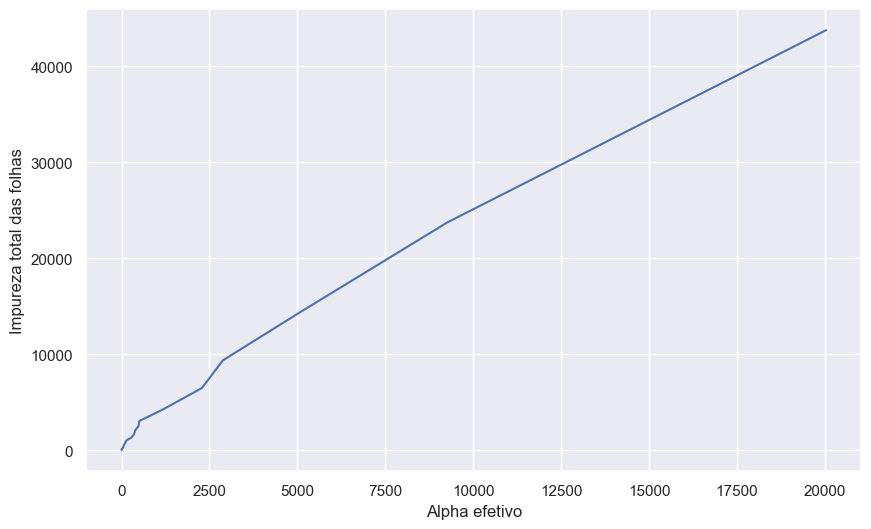

In [70]:
# Avaliando o alfa juntamente com a impureza total das folhas
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [71]:
#Loop para descobrir o melhor ccp_alpha
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

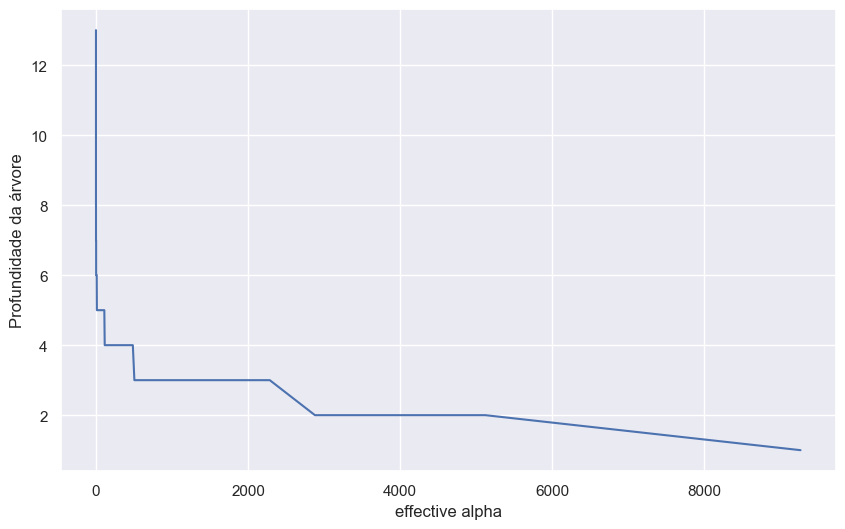

In [72]:
# Melhor ccp_alpha pela profunidade da arvore
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [74]:
#Avaliando o R2 nas vases de treino e teste
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

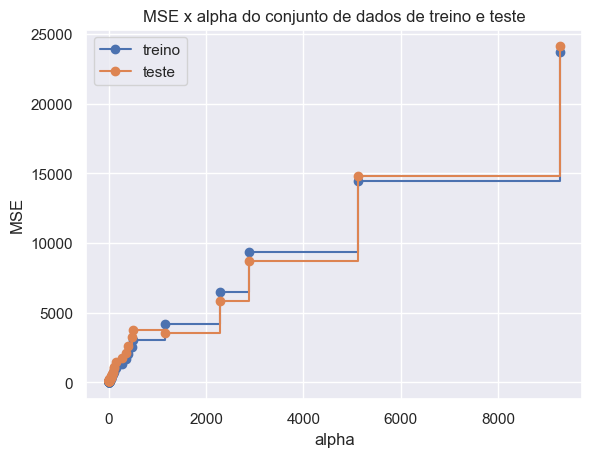

In [75]:
#Utilizando a medida de MSE para escolher o melhor alpha
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [76]:
#Utilizando o ccp_alpha após a pré poda
regr_3 = DecisionTreeRegressor(random_state = 0, ccp_alpha = 2000)

regr_3.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=2000, random_state=0)

In [77]:
#avaliando novamente o modelo
mse3 = regr_3.score(X_train, y_train)
template = 'O R-quadrado da árvore é: {1:.2f}'
print(template.format(regr_3.get_depth(), mse3). replace('.',','))

O R-quadrado da árvore é: 0,90


In [78]:
y_pred = regr_3.predict(X_train)
r2_score(y_train, y_pred)

0.9040916563899832

In [79]:
# Predição dos novos dados dacquestão 4
new_output = regr_3.predict(x_test_ex)
# summarize input and output
print(new_input, new_output)

{'id': [2595], 'nome': ['Skylit Midtown Castle'], 'host_id': [2845], 'host_name': ['Jennifer'], 'bairro_group': ['Manhattan'], 'bairro': ['Midtown'], 'latitude': [40.75362], 'longitude': [-73.98377], 'room_type': ['Entire home/apt'], 'price': [225], 'minimo_noites': [1], 'numero_de_reviews': [45], 'ultima_review': ['2019-05-21'], 'reviews_por_mes': [0.38], 'calculado_host_listings_count': [2], 'disponibilidade_365': [355]} [197.44790702]


## 5) Salvando o Modelo

In [84]:
# salvar modelo
import pickle
# salvar o modelo DecisionTree model_decisiontree.pkl
with open('model_decisiontree.pkl', 'wb') as file:
    pickle.dump(regr_3, file)